# Preproccesing

In [1]:
#### Imports ####
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.pyplot import imshow, show, subplot,title,axis
from matplotlib.patches import Circle
from skimage.io import imread
from skimage import img_as_float,img_as_ubyte
from skimage.color import rgb2hsv,hsv2rgb,rgb2gray
import skimage.util
import skimage as sk
import scipy
import scipy.ndimage
import scipy.signal
import scipy.signal as signal
from scipy.signal import convolve,gaussian
from scipy.signal import convolve2d
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import ndimage
import matplotlib.patches as patches
import os

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_images_from_folder(folder_path):
    """
    Load all images from the specified folder and return them as a list of images read by OpenCV.
    """
    images = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = imread(image_path)
        if img is not None:
            images.append(img)
        else:
            print(f"Error loading image {filename}")
    return images

path = r"./image/penetramax"

im = load_images_from_folder(path)

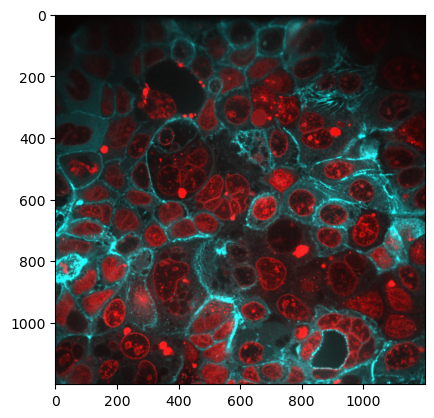

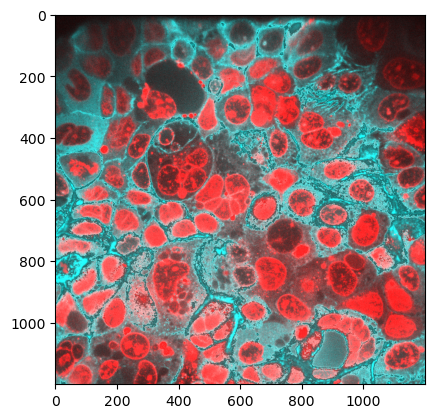

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, img_as_float, img_as_ubyte

def brighten_dark_areas(image, threshold=0.3, factor=3.):
    """
    Brighten dark areas of the image using scikit-image.
    
    :param image: Input image as a numpy array.
    :param threshold: Brightness threshold below which areas are considered dark.
    :param factor: Brightness enhancement factor.
    :return: Image with brightened dark areas.
    """
    # Convert image to float
    image_float = img_as_float(image)
    
    # Convert image to grayscale
    grayscale = color.rgb2gray(image_float)
    
    # Create a mask for dark areas
    dark_mask = grayscale < threshold
    
    # Brighten the dark areas
    brightened_image = image_float.copy()
    brightened_image[dark_mask] *= factor
    
    # Clip the values to ensure they stay within [0, 1] range
    brightened_image = np.clip(brightened_image, 0, 1)
    
    # Convert back to original dtype
    brightened_image = img_as_ubyte(brightened_image)
    
    return brightened_image

imshow(im[6])
plt.show()
imshow(brighten_dark_areas(im[6]))
plt.show()

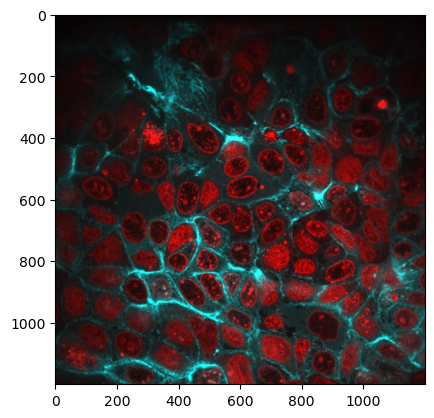

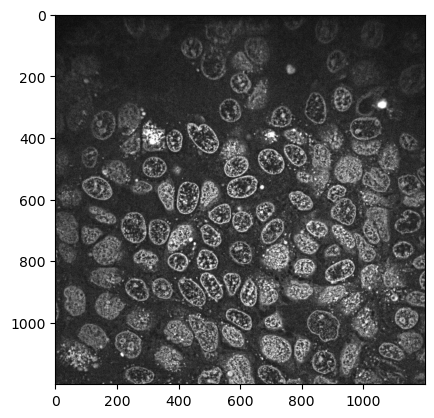

In [4]:
imshow(im[5])
plt.show()
histim  = np.copy(im[5])

histim[:,:,0] = skimage.exposure.equalize_adapthist(im[5][:,:,0], kernel_size=40, clip_limit=0.01, nbins=512)
histimage = skimage.exposure.equalize_adapthist(im[5][:,:,0], kernel_size=10, clip_limit=0.01, nbins=512)
imshow(histimage*100,cmap="gray")

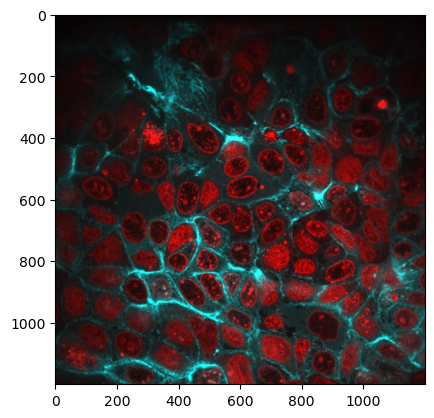

/home/amaschio/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


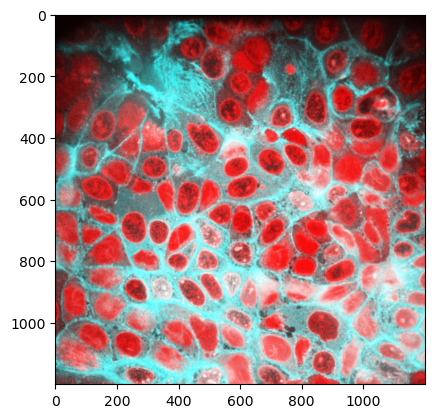

In [5]:
imshow(im[5])
plt.show()

imshow(skimage.exposure.equalize_hist(im[5], nbins=1200, mask=None))

In [6]:
from cellpose import denoise

en_im= []
for i in im:
    en_im.append(skimage.exposure.equalize_adapthist(i, kernel_size=50, clip_limit=0.5, nbins=512))

In [7]:
# masksX= model.eval(en_im, channels=[1,0], diameter=30.)

NameError: name 'masksX' is not defined

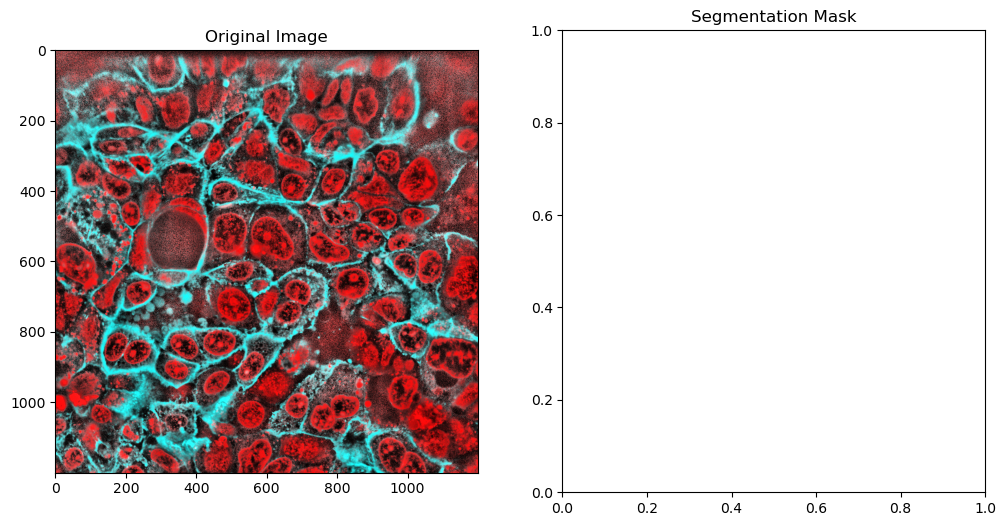

In [ ]:
import cv2
import matplotlib.pyplot as plt
from cellpose import models
import numpy as np

en_im= []
for i in im:
    en_im.append(skimage.exposure.equalize_adapthist(i, kernel_size=50, clip_limit=0.01, nbins=512))

# Load Cellpose model for nuclei
model = models.Cellpose(gpu=True, model_type='nuclei')

# Assuming your images are stored in a list called image_list
for i, image in enumerate(en_im):
    # Run segmentation
    masks, flows, styles, diams = model.eval(image, diameter=40, channels=[1, 0])
    print(masks.shape)
    # Create an empty RGB image to hold the segmented masks
    masks_rgb = np.zeros_like(image)

    # Set the red channel of masks_rgb to the segmented masks
    masks_rgb[:, :, 0] = masks
    
    # Blend original image and masks
    alpha = 0.5  # Adjust transparency here
    overlay = cv2.addWeighted(image, 1 - alpha, masks_rgb, alpha, 0)

    # Display the original image with masks overlay
    plt.figure(figsize=(10, 5))
    plt.imshow(overlay)
    plt.title('Original Image with Segmented Nuclei')
    plt.axis('off')
    plt.show()
    
for i in range(len(im)):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(en_im[i], cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('Segmentation Mask')
    plt.imshow(masksX[i], cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


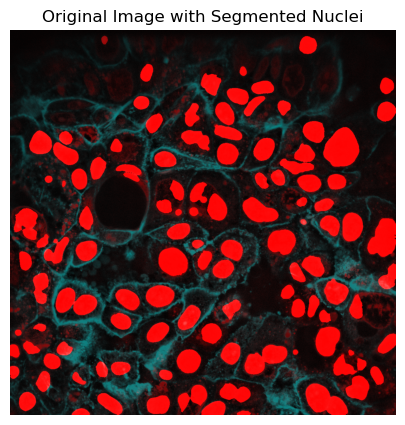

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


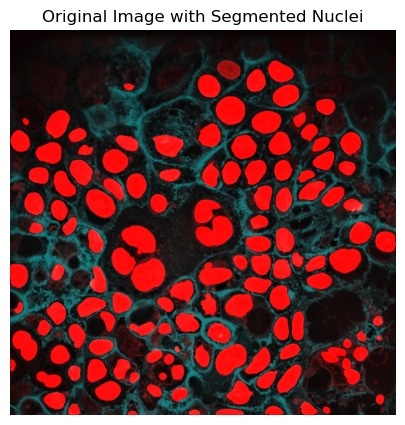

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


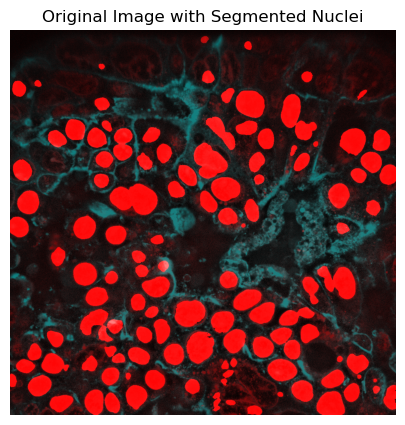

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


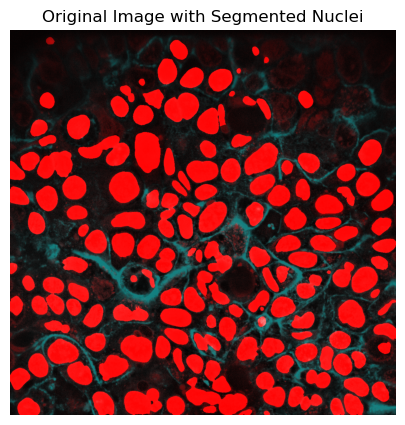

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


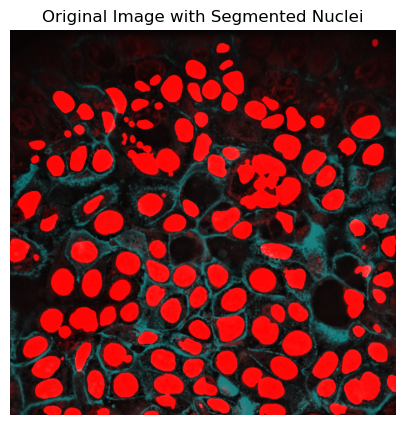

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


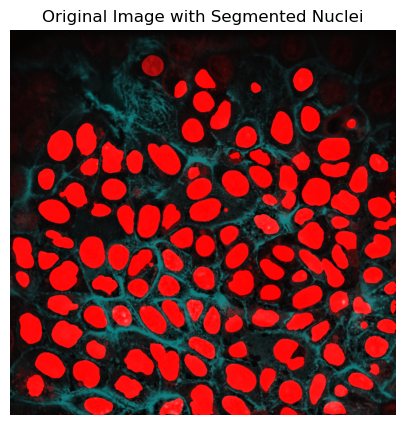

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


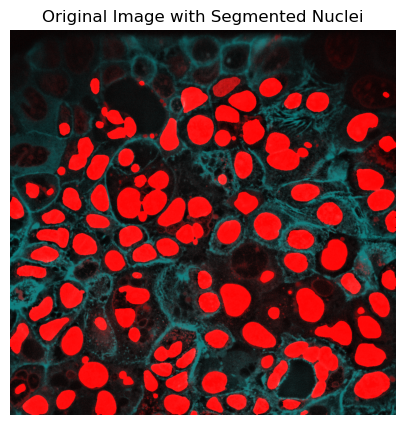

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200)


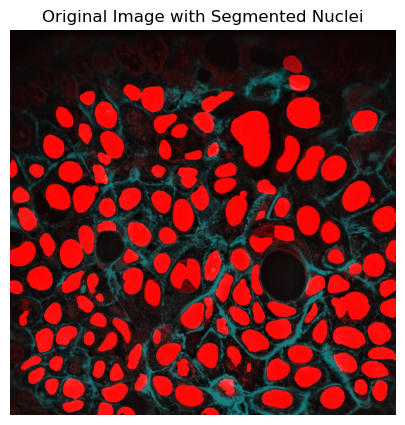

In [9]:
import cv2
import matplotlib.pyplot as plt
from cellpose import models
import numpy as np

en_im= []
for i in im:
    en_im.append(skimage.exposure.equalize_adapthist(i, kernel_size=50, clip_limit=0.01, nbins=512))

# Load Cellpose model for nuclei
model = models.Cellpose(gpu=True, model_type='nuclei')

# Assuming your images are stored in a list called image_list
for i, image in enumerate(en_im):
    # Run segmentation
    masks, flows, styles, diams = model.eval(image, diameter=40, channels=[1, 0])
    print(masks.shape)
    # Create an empty RGB image to hold the segmented masks
    masks_rgb = np.zeros_like(image)

    # Set the red channel of masks_rgb to the segmented masks
    masks_rgb[:, :, 0] = masks
    
    # Blend original image and masks
    alpha = 0.5  # Adjust transparency here
    overlay = cv2.addWeighted(image, 1 - alpha, masks_rgb, alpha, 0)

    # Display the original image with masks overlay
    plt.figure(figsize=(10, 5))
    plt.imshow(overlay)
    plt.title('Original Image with Segmented Nuclei')
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np

# Assuming your numpy array is named 'array'
unique_values = np.unique(masks)
num_unique_values = len(unique_values)
print("Number of unique values:", num_unique_values)

In [ ]:
from skimage import measure

labels,number = skimage.measure.label(masks, background=0, return_num=True, connectivity=2)

In [ ]:
import numpy as np
from skimage import measure

# Assuming your image is named 'image'
# image is a numpy array representing the image

# Threshold the image to create a binary mask of non-zero pixels
# binary_mask = (masks != 0).astype(np.uint8)

# Label connected components in the binary mask
# labels = measure.label(binary_mask, connectivity=2)

# Find the properties of each labeled region
regions = measure.regionprops(masks)
size =[]
# Iterate over each labeled region
for region_id, region in enumerate(regions):
    # Extract the bounding box of the region
    min_row, min_col, max_row, max_col = region.bbox
    bi_mask = region.image
    print(bi_mask.shape)
    size.append((bi_mask.shape[0],bi_mask.shape[1]))
    # # print(min_row,region_id)
    # cent = region.centroid
    # print(cent)
    # Extract the region of interest from the original image
    region_of_interest = en_im[9][min_row:max_row,min_col:max_col]
    # region_of_interest_bmask  = im[9][bi_mask]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('bbox Image')
    plt.imshow(region_of_interest, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('bi- Mask')
    plt.imshow(bi_mask, cmap='gray')
    plt.show()

    # Display or process the region_of_interest as needed
    # For example, you can save it as a separate image
    # Uncomment the line below to save the region as an image
    # skimage.io.imsave(f"region_{region_id}.png", region_of_interest)

print(np.max(size))
